In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

np.set_printoptions(precision=4, suppress=True)

In [2]:
# define the broken/good cobras
#brokens = [1, 39, 43, 54]
brokens = []
visibles= [e for e in range(1,58) if e not in brokens]
badIdx = np.array(brokens) - 1
goodIdx = np.array(visibles) - 1

# two groups for two cameras
cam_split = 28
group1 = goodIdx[goodIdx <= cam_split]
group2 = goodIdx[goodIdx > cam_split]

In [8]:
path = '/data/MCS/20191203_032/data/'
centers = np.load(path + 'thetaCenter.npy')
radius = np.load(path + 'thetaRadius.npy')
fw = np.load(path + 'thetaFW.npy')
rv = np.load(path + 'thetaRV.npy')
af = np.load(path + 'thetaAngFW.npy')
ar = np.load(path + 'thetaAngRV.npy')
sf = np.load(path + 'thetaSpeedFW.npy')
sr = np.load(path + 'thetaSpeedRV.npy')
badR = np.load(path + 'badRange.npy')
mf = np.load(path + 'thetaMMFW.npy')
mr = np.load(path + 'thetaMMRV.npy')
bad = np.load(path + 'bad.npy')

In [ ]:
centers = np.load(path + 'thetaCenter_A.npy')
radius = np.load(path + 'thetaRadius_A.npy')
fw = np.load(path + 'thetaFW_A.npy')
rv = np.load(path + 'thetaRV_A.npy')
af = np.load(path + 'thetaAngFW_A.npy')
ar = np.load(path + 'thetaAngRV_A.npy')
sf = np.load(path + 'thetaSpeedFW_A.npy')
sr = np.load(path + 'thetaSpeedRV_A.npy')
badR = np.load(path + 'badRange_A.npy')
mf = np.load(path + 'thetaMMFW_A.npy')
mr = np.load(path + 'thetaMMRV_A.npy')
bad = np.load(path + 'bad_A.npy')
mf2 = np.load(path + 'thetaMMFW2_A.npy')
mr2 = np.load(path + 'thetaMMRV2_A.npy')
bad2 = np.load(path + 'bad2_A.npy')

In [ ]:
centers, radius

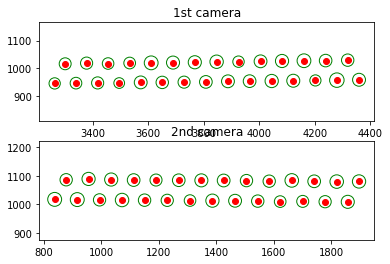

In [9]:
plt.figure(1)
plt.clf()

plt.subplot(211)
ax = plt.gca()
ax.axis('equal')

ax.plot(centers[group1].real, centers[group1].imag, 'ro')
for idx in group1:
    c = plt.Circle((centers[idx].real, centers[idx].imag), radius[idx], color='g', fill=False)
    ax.add_artist(c)
ax.set_title(f'1st camera')

plt.subplot(212)
ax = plt.gca()
ax.axis('equal')

ax.plot(centers[group2].real, centers[group2].imag, 'ro')
for idx in group2:
    c = plt.Circle((centers[idx].real, centers[idx].imag), radius[idx], color='g', fill=False)
    ax.add_artist(c)
ax.set_title(f'2nd camera')

plt.show()

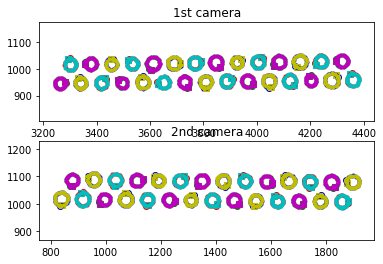

In [10]:
plt.figure(2)
plt.clf()

plt.subplot(211)
ax = plt.gca()
ax.axis('equal')
ax.set_title(f'1st camera')

for n in range(1):
    for k in group1:
        if k % 3 == 0:
            c = 'r'
            d = 'c'
        elif k % 3 == 1:
            c = 'g'
            d = 'm'
        else:
            c = 'b'
            d = 'y'
        ax.plot(fw[k][n,0].real, fw[k][n,0].imag, c + 'o')
        ax.plot(rv[k][n,0].real, rv[k][n,0].imag, d + 's')
        ax.plot(fw[k][n,1:].real, fw[k][n,1:].imag, c + '.')
        ax.plot(rv[k][n,1:].real, rv[k][n,1:].imag, d + '.')

plt.subplot(212)
ax = plt.gca()
ax.axis('equal')
ax.set_title(f'2nd camera')

for n in range(1):
    for k in group2:
        if k % 3 == 0:
            c = 'r'
            d = 'c'
        elif k % 3 == 1:
            c = 'g'
            d = 'm'
        else:
            c = 'b'
            d = 'y'
        ax.plot(fw[k][n,0].real, fw[k][n,0].imag, c + 'o')
        ax.plot(rv[k][n,0].real, rv[k][n,0].imag, d + 's')
        ax.plot(fw[k][n,1:].real, fw[k][n,1:].imag, c + '.')
        ax.plot(rv[k][n,1:].real, rv[k][n,1:].imag, d + '.')

plt.show()

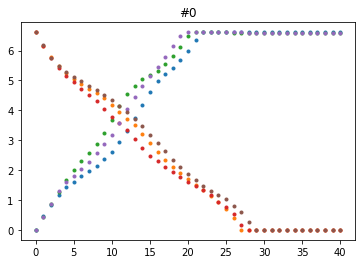

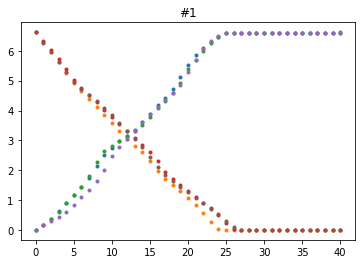

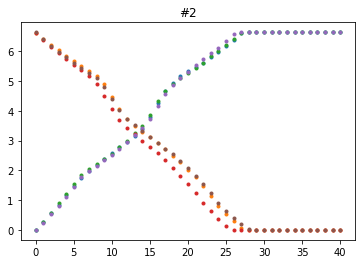

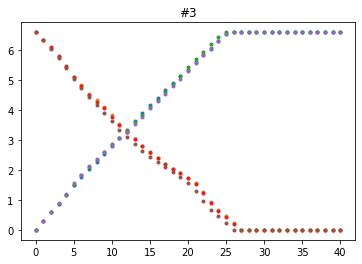

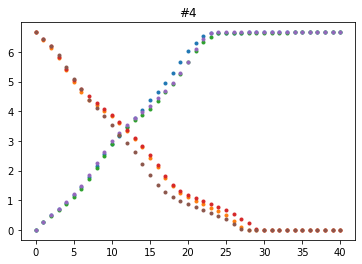

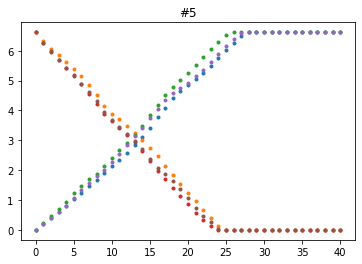

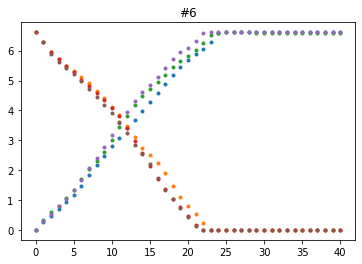

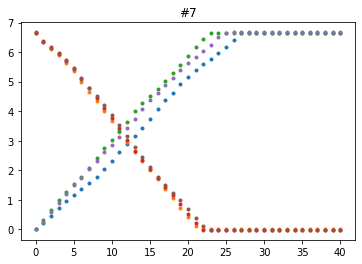

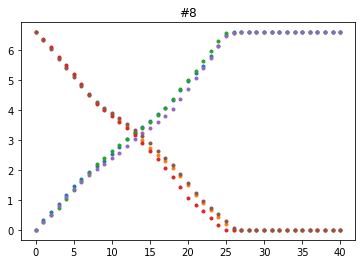

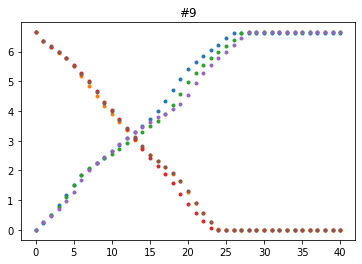

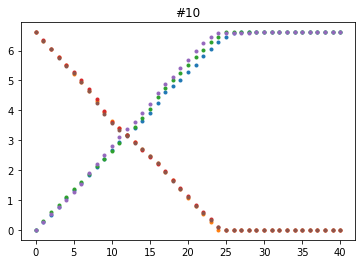

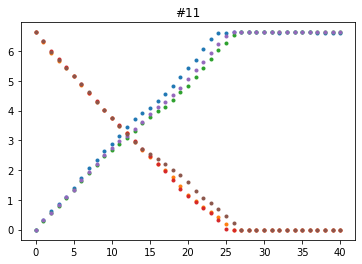

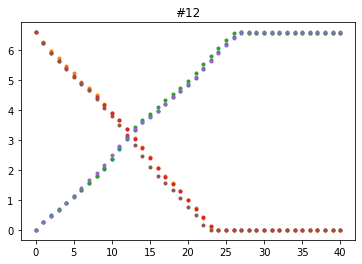

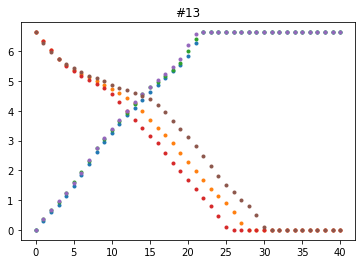

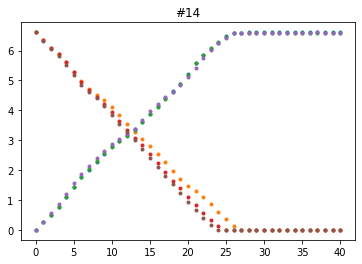

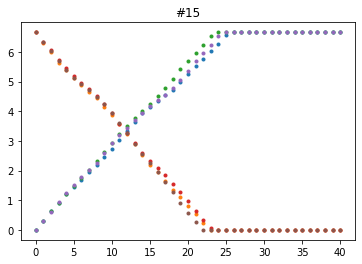

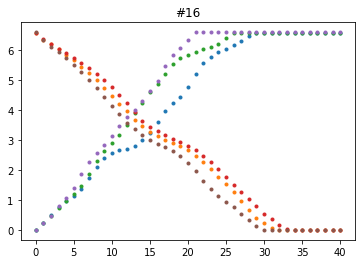

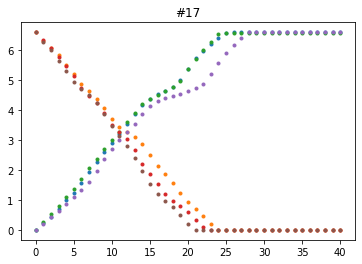

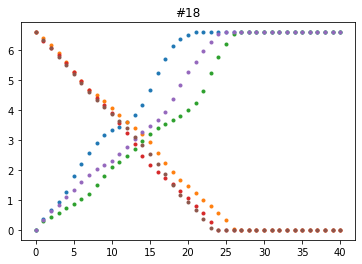

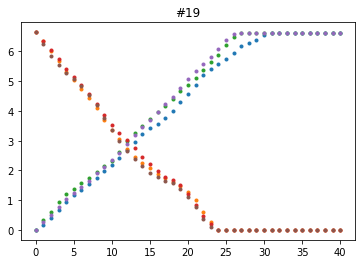

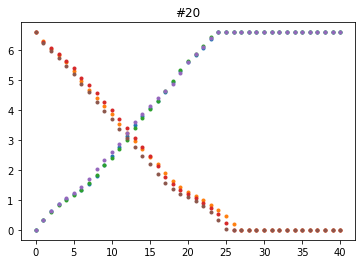

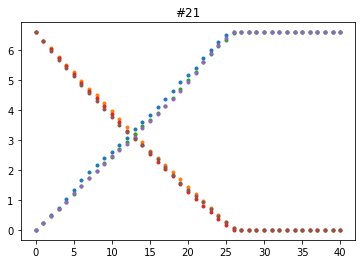

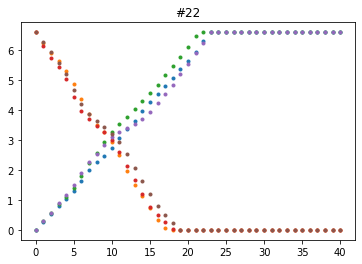

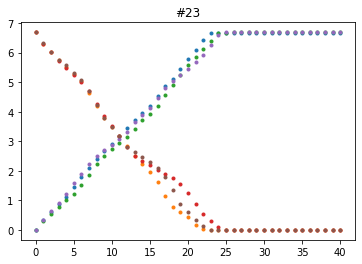

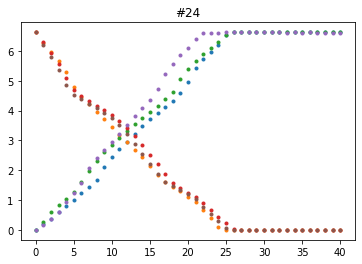

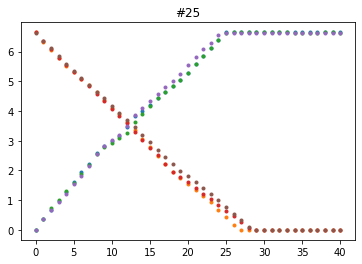

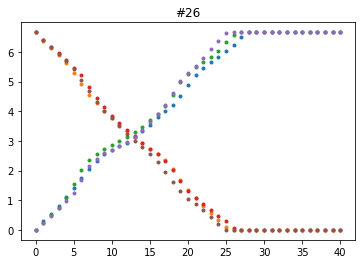

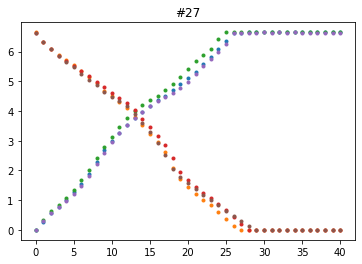

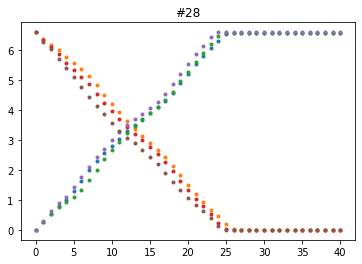

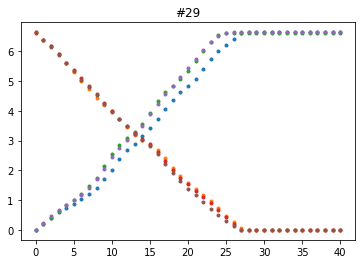

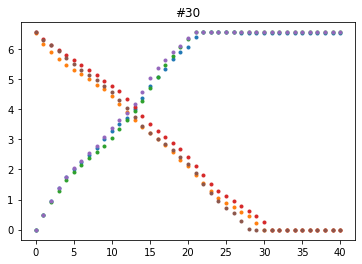

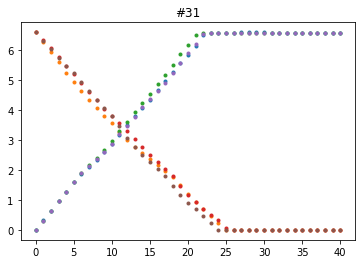

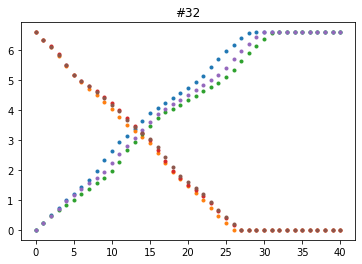

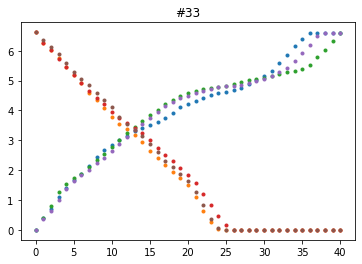

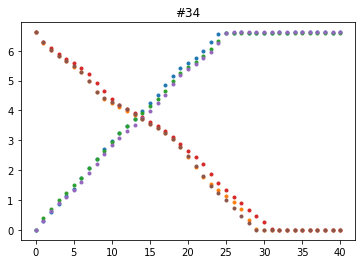

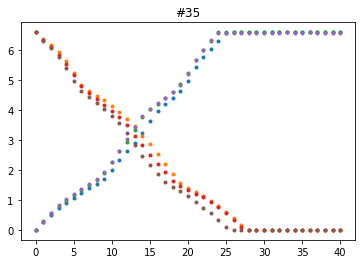

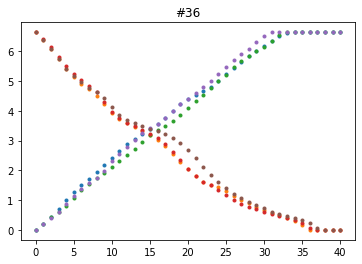

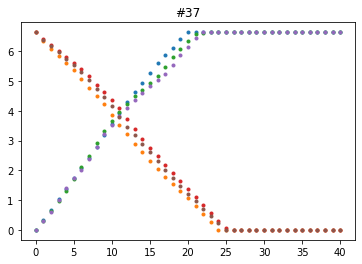

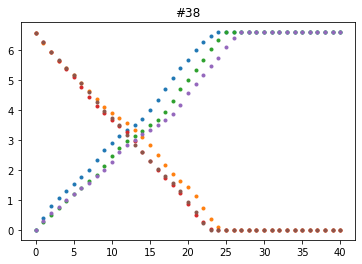

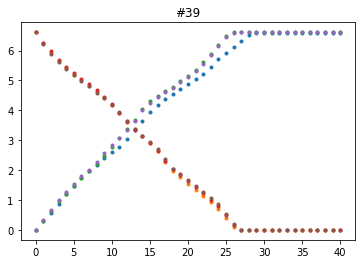

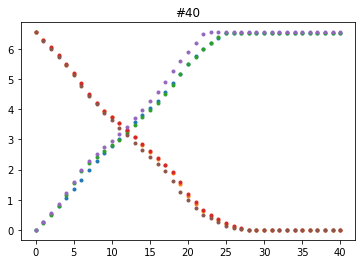

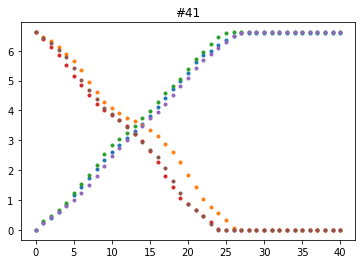

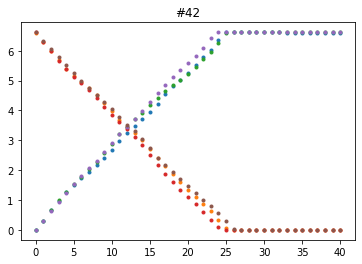

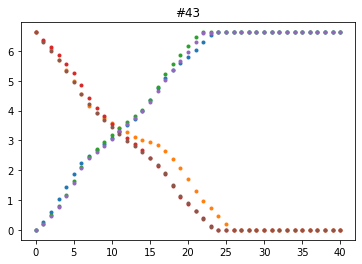

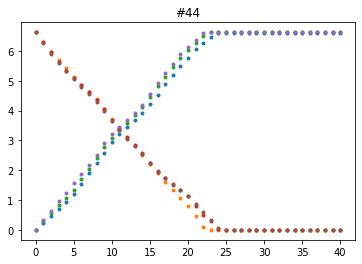

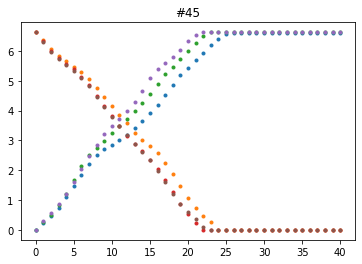

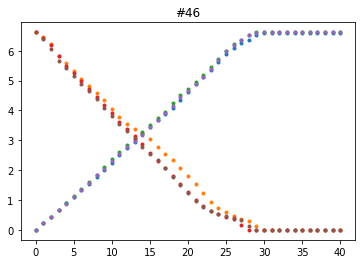

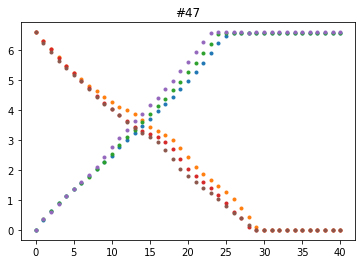

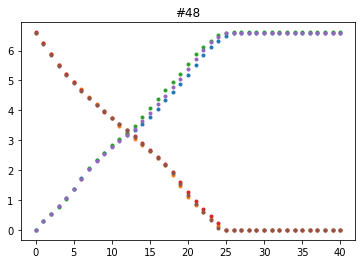

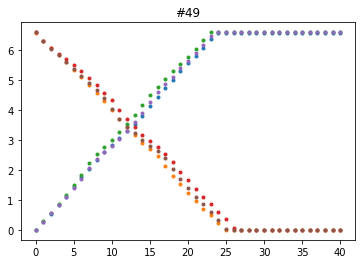

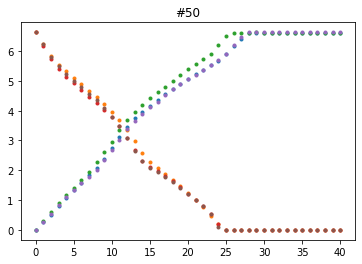

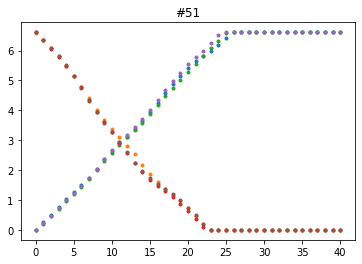

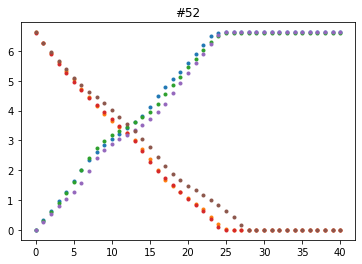

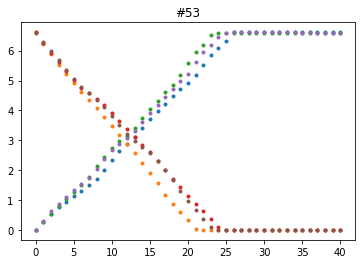

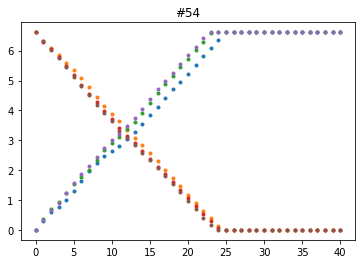

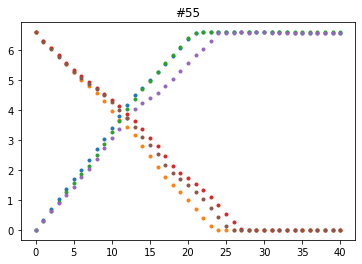

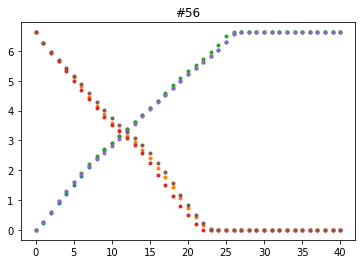

In [11]:
for c in range(57):
    plt.figure(3)
    plt.clf()
    ax = plt.gca()
    ax.set_title(f'#{c}')
    for n in range(af.shape[1]):
        ax.plot(af[c, n], '.')
        ax.plot(ar[c, n], '.')
    plt.show()

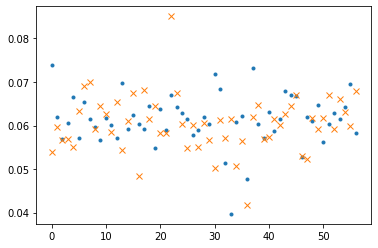

In [12]:
plt.figure(4)
plt.clf()
ax = plt.gca()

ax.plot(np.rad2deg(sf), '.')
ax.plot(np.rad2deg(sr), 'x')
#ax.plot(sf2, '.')
#ax.plot(sr2, 'x')

In [ ]:
bad, badR

In [ ]:
c = 17

plt.figure(5)
plt.clf()

#plt.subplot(211)
ax = plt.gca()
ax.set_title(f'#{c} FW')
ax.plot(np.rad2deg(mf[c]), 'r')


#plt.subplot(212)
ax = plt.gca()
ax.set_title(f'#{c} RV')
ax.plot(np.rad2deg(mr[c]), 'b')

In [ ]:
c = 30

plt.figure(5)
plt.clf()

#plt.subplot(211)
ax = plt.gca()
ax.set_title(f'#{c} FW')
ax.plot(mf2[c], 'r')


#plt.subplot(212)
ax = plt.gca()
ax.set_title(f'#{c} RV')
ax.plot(mr2[c], 'b')

In [ ]:
from ics.cobraCharmer import pfiDesign
import pathlib

In [ ]:
xml = pathlib.Path('/home/pfs/Documents/cwen/ics_cobraCharmer/xml/SC02_08.xml')
#xml = pathlib.Path('/data/MCS/20191121_011/output/SC02_theta_250.xml')
model = pfiDesign.PFIDesign(xml)

In [ ]:
model.motorOntimeSlowFwd1, model.motorOntimeSlowRev1

In [ ]:
(model.tht1-model.tht0) % (np.pi*2), np.rad2deg((model.tht1-model.tht0) % (np.pi*2)), np.rad2deg(6.2)

In [ ]:
tf = model.motorOntimeSlowFwd1.copy()
tr = model.motorOntimeSlowRev1.copy()

In [ ]:
np.where(tf>0.07), np.where(tr>0.07)

In [ ]:
tf, tr

In [ ]:
spd_adj = np.deg2rad(0.075)
tf /= 1+(sf/spd_adj-1)/3
tr /= 1+(sr/spd_adj-1)/3

In [ ]:
tf, tr

In [ ]:
tf[18] = 0.06

In [ ]:
np.where(np.rad2deg(sf) < 0.05)

In [ ]:
tr[41] = 0.06
tr[56] = 0.05

In [ ]:
tr[np.rad2deg(sr) < 0.05] *= 1.2

In [ ]:
tf[10] = 0.05

In [ ]:
tf, tr

In [ ]:
tr[41], tr[56]

In [ ]:
model.motorOntimeSlowFwd1[17], model.motorOntimeSlowRev1[17]

In [ ]:
model.updateOntimes(thetaFwd=tf, thetaRev=tr, fast=False)

In [ ]:
model.createCalibrationFile('/home/pfs/Documents/cwen/ics_cobraCharmer/xml/SC02_09.xml')

In [ ]:
tf[13], tr[13]

In [ ]:
tf[5] = 0.04
tr[5] = 0.04
tf[30] = 0.035

In [ ]:
fw[19], rv[19]

In [ ]:
tr[13] = 0.045

In [ ]:
ar[1,0]

In [ ]:
np.argmin(abs(ar[1,0]%(np.pi*2) - np.pi))

In [ ]:
fw[30], rv[30]

In [ ]:
fw[43], rv[43], centers[43]

In [ ]:
data = np.concatenate((fw[33].flatten(), rv[33].flatten()))

In [ ]:
np.max(np.real(data)), np.min(np.real(data)), np.max(np.imag(data)), np.min(np.imag(data))

In [ ]:
centers[33]

In [ ]:
data = rv[33, 1].flatten()
plt.plot(np.real(data), np.imag(data), '.')

In [ ]:
model.centers, centers, model.centers - centers

In [ ]:
path = '/data/MCS/20191121_002/data/'
data = np.load(path + 'thetaData.npy')

In [ ]:
c = 17

plt.figure(4)
plt.clf()
for n in range(data.shape[1]):
    plt.plot(np.rad2deg(data[c,n,:,0]))

In [ ]:
np.rad2deg(data[17,31,:,0]), data[17,31,:,3]

In [ ]:
data.shape

In [ ]:
steps = np.arange(1,41)*250
spdf_avg = np.rad2deg(np.average(af, axis=1))[:,1:] / steps
spdr_avg = np.rad2deg(np.average(ar[:,:,0][...,np.newaxis]-ar, axis=1))[:,1:] / steps
spdf_std = np.rad2deg(np.std(af, axis=1))[:,1:] / steps
spdr_std = np.rad2deg(np.std(ar[:,:,0][...,np.newaxis]-ar, axis=1))[:,1:] / steps

In [ ]:
np.max(spdf_avg, axis=1), np.max(spdr_avg, axis=1), np.max(spdf_std, axis=1), np.max(spdr_std, axis=1)

In [ ]:
(sf-sf2)*1000, (sr-sr2)*1000

In [ ]:
np.rad2deg(sf[25:32])

In [ ]:
af[25], ar[25]